In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../kdd2004.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', 'target'],
      dtype='object')

In [4]:
df.target.value_counts(normalize=True)

target
-1    0.991108
 1    0.008892
Name: proportion, dtype: float64

In [5]:
df.target = df.target.map({-1:0, 1:1})
df.target



0         0
1         0
2         0
3         0
4         0
         ..
145746    0
145747    0
145748    1
145749    0
145750    1
Name: target, Length: 145751, dtype: int64

In [6]:
df.target = df.target.map({0:-1, 1:1})
df.target

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
145746   -1
145747   -1
145748    1
145749   -1
145750    1
Name: target, Length: 145751, dtype: int64

In [7]:
df.target = df.target.map({-1:0, 1:1})
df.target

0         0
1         0
2         0
3         0
4         0
         ..
145746    0
145747    0
145748    1
145749    0
145750    1
Name: target, Length: 145751, dtype: int64

In [8]:
df.target.unique()

array([0, 1])

In [9]:
help(df.target.value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, bins=None, dropna: 'bool' = True) -> 'Series' method of pandas.core.series.Series instance
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies when True. Preserve the order of the data when False.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, defa

In [10]:
df.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

# Training a model

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [12]:
X = df.drop('target', axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,-8.0,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,-6.0,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,7.0,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,6.0,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,-14.0,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23


In [13]:
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102025, 74), (102025,), (43726, 74), (43726,))

# Training ML model

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=0)

In [18]:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_train_rf[:5]

array([0.00424303, 0.00355334, 0.00355334, 0.00355334, 0.00355334])

In [19]:
y_test_rf = rf.predict_proba(X_test)[:,1]
type(y_test_rf)

numpy.ndarray

In [20]:
import sklearn.linear_model

In [21]:
dir(sklearn.linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'LogisticRegression',
 'LogisticRegressionCV',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'QuantileRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDOneClassSVM',
 'SGDRegressor',
 'TheilSenRegressor',
 'TweedieRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_glm',
 '_huber',
 '_least_angle',
 '_linear_loss',
 '_logistic',
 '_omp',
 '_passiv

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [24]:
lr = LogisticRegression(random_state=0, max_iter=100)
lr.fit(X_train, y_train)

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [25]:
?lr

Type:        LogisticRegression
String form: LogisticRegression(random_state=0)
File:        ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for
the L2 penalty. The Elastic-Net regularization is only supported by the
'saga' solver.

For :term:`multiclass` problems, only 'newton-cg

In [26]:
y_train_lr = lr.predict_proba(X_train)[:,1]
y_test_lr = lr.predict_proba(X_test)[:,1]

# Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
y_test_base = pd.Series(np.zeros(len(y_test)))

In [29]:
cm = confusion_matrix(y_test, y_test_base, labels=[0,1])
cm

array([[43321,     0],
       [  405,     0]])

<Axes: >

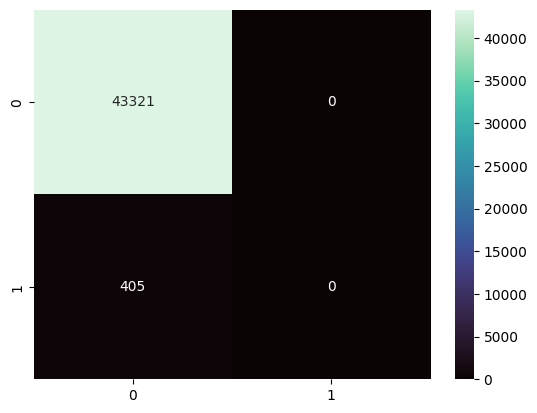

In [30]:
sns.heatmap(cm, annot=True, cmap='mako', fmt='d')

In [31]:
?confusion_matrix

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

<Axes: >

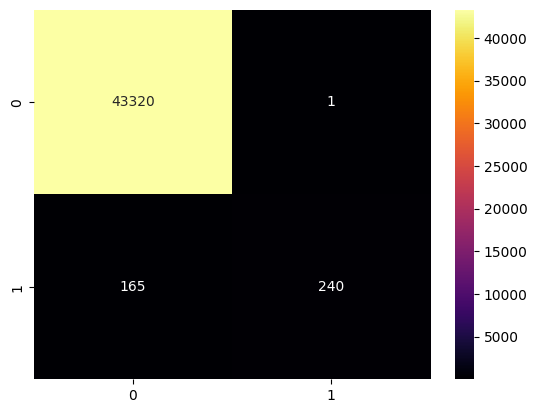

In [32]:
cm = confusion_matrix(y_test, rf.predict(X_test), labels=[0,1])
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')

<Axes: >

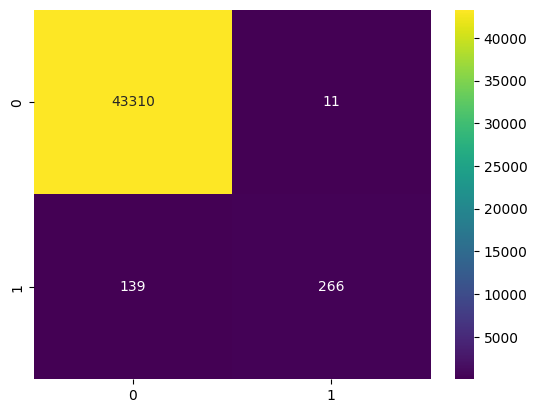

In [33]:
cm = confusion_matrix(y_test, lr.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')

# FPR, False Positive Rate & FNR, False Negative Rate

In [34]:
confusion_matrix(y_test, y_test_base, labels=[0,1])

array([[43321,     0],
       [  405,     0]])

In [35]:
confusion_matrix(y_test, y_test_base, labels=[0,1]).ravel()

array([43321,     0,   405,     0])

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_base, labels=[0,1]).ravel()

In [37]:
FPR = fp / (tn + fp)
FNR = fn / (fn + tp)

In [38]:
print(f"""
False Positive Rate, baseline: {FPR},
False Negative Rate, baseline: {FNR}      
""")


False Positive Rate, baseline: 0.0,
False Negative Rate, baseline: 1.0      



In [39]:
tn, fp, fn, tp=confusion_matrix(y_test, rf.predict(X_test), labels=[0,1]).ravel()

In [40]:
FPR = fp/(fp+tn)
FNR = fn/(fn+tp)

In [41]:
print("RF's FPR: ", FPR)
print("RF's FNR: ", FNR)

RF's FPR:  2.3083492994159875e-05
RF's FNR:  0.4074074074074074


In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(X_test), labels=[0,1]).ravel()

FPR = fp/(fp + tn)
FNR = fn/(fn + tp)

In [43]:
print("LR's FPR: ", FPR)
print("LR's FNR: ", FNR)

LR's FPR:  0.00025391842293575863
LR's FNR:  0.3432098765432099


# FPR and FNR vs probability threshold

In [44]:
?np.linspace

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
    *,
    device=None,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7f551818b5b0>
File:            ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/numpy/_core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence,

In [45]:
thresholds = np.linspace(0, 1, 100)
thresholds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [46]:
type(thresholds)

numpy.ndarray

In [47]:
fpr_ls = []
fnr_ls = []


In [48]:
#Obtaining probabilities
probs = lr.predict_proba(X_test)[:,1]

In [49]:
for i,threshold in enumerate(thresholds):
    # print(threshold)

    condition = probs >= threshold
    preds = np.where(condition, 1, 0)

    tn, fp, fn, tp = confusion_matrix(y_test, preds, labels=[0,1]).ravel()

    #obtain FPR and FNR
    FPR = fp/(fp + tn)
    FNR = fn/(fn + tp)

    fpr_ls.append(FPR)
    fnr_ls.append(FNR)



In [50]:
len(fpr_ls)

100

In [51]:
pd.Series(fpr_ls)

0     1.000000
1     0.062025
2     0.029939
3     0.018190
4     0.012719
        ...   
95    0.000000
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Length: 100, dtype: float64

In [52]:
pd.Series(fnr_ls)

0     0.000000
1     0.096296
2     0.123457
3     0.150617
4     0.165432
        ...   
95    0.488889
96    0.491358
97    0.503704
98    0.533333
99    0.958025
Length: 100, dtype: float64

In [53]:
pd.concat([pd.Series(fpr_ls), pd.Series(fnr_ls)])

0     1.000000
1     0.062025
2     0.029939
3     0.018190
4     0.012719
        ...   
95    0.488889
96    0.491358
97    0.503704
98    0.533333
99    0.958025
Length: 200, dtype: float64

In [54]:
?pd.concat

Signature:
pd.concat(
    objs: 'Iterable[Series | DataFrame] | Mapping[HashableT, Series | DataFrame]',
    *,
    axis: 'Axis' = 0,
    join: 'str' = 'outer',
    ignore_index: 'bool' = False,
    keys: 'Iterable[Hashable] | None' = None,
    levels=None,
    names: 'list[HashableT] | None' = None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool | None' = None,
) -> 'DataFrame | Series'
Docstring:
Concatenate pandas objects along a particular axis.

Allows optional set logic along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
  

In [55]:
pd.concat([pd.Series(fpr_ls), pd.Series(fnr_ls)], axis=1)

,0,1
0,1.000000,0.000000
1,0.062025,0.096296
2,0.029939,0.123457
3,0.018190,0.150617
4,0.012719,0.165432
...,...,...
95,0.000000,0.488889
96,0.000000,0.491358
97,0.000000,0.503704
98,0.000000,0.533333


In [56]:
len(fpr_ls)

100

In [57]:
metrics = pd.concat([pd.Series(fpr_ls), pd.Series(fnr_ls)], axis=1)
metrics.head()

,0,1
0,1.000000,0.000000
1,0.062025,0.096296
2,0.029939,0.123457
3,0.018190,0.150617
4,0.012719,0.165432


In [58]:
metrics.columns = ['FPR', 'FNR']
metrics.head()

,FPR,FNR
0,1.000000,0.000000
1,0.062025,0.096296
2,0.029939,0.123457
3,0.018190,0.150617
4,0.012719,0.165432


In [59]:
len(metrics)

100

In [60]:
dir(metrics)

['FNR',
 'FPR',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 

In [61]:
metrics.shape, thresholds.shape

((100, 2), (100,))

In [62]:
metrics.index = thresholds

In [63]:
metrics.head()

,FPR,FNR
0.000000,1.000000,0.000000
0.010101,0.062025,0.096296
0.020202,0.029939,0.123457
0.030303,0.018190,0.150617
0.040404,0.012719,0.165432


<Axes: >

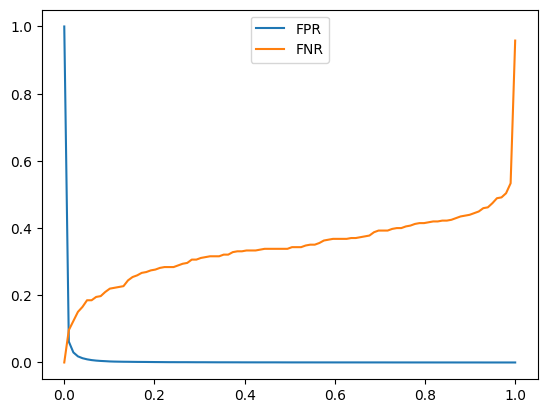

In [64]:
metrics.plot()

In [65]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_base',
 '_compat',
 '_core',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix

In [66]:
?sns.lineplot

Signature:
sns.lineplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    units=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    orient='x',
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ci='deprecated',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ine

In [68]:
metrics.head()

,FPR,FNR
0.000000,1.000000,0.000000
0.010101,0.062025,0.096296
0.020202,0.029939,0.123457
0.030303,0.018190,0.150617
0.040404,0.012719,0.165432


In [69]:
metrics.index

Index([                 0.0, 0.010101010101010102, 0.020202020202020204,
       0.030303030303030304,  0.04040404040404041,  0.05050505050505051,
        0.06060606060606061,  0.07070707070707072,  0.08080808080808081,
        0.09090909090909091,  0.10101010101010102,  0.11111111111111112,
        0.12121212121212122,  0.13131313131313133,  0.14141414141414144,
        0.15151515151515152,  0.16161616161616163,  0.17171717171717174,
        0.18181818181818182,  0.19191919191919193,  0.20202020202020204,
        0.21212121212121213,  0.22222222222222224,  0.23232323232323235,
        0.24242424242424243,  0.25252525252525254,  0.26262626262626265,
        0.27272727272727276,   0.2828282828282829,  0.29292929292929293,
        0.30303030303030304,  0.31313131313131315,  0.32323232323232326,
        0.33333333333333337,   0.3434343434343435,   0.3535353535353536,
        0.36363636363636365,  0.37373737373737376,  0.38383838383838387,
          0.393939393939394,   0.4040404040404041, 

In [70]:
metrics.columns

Index(['FPR', 'FNR'], dtype='object')

In [76]:
?plt.legend

Signature: plt.legend(*args, **kwargs) -> 'Legend'
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for a

In [77]:
?sns.lineplot

Signature:
sns.lineplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    units=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    orient='x',
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ci='deprecated',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ine

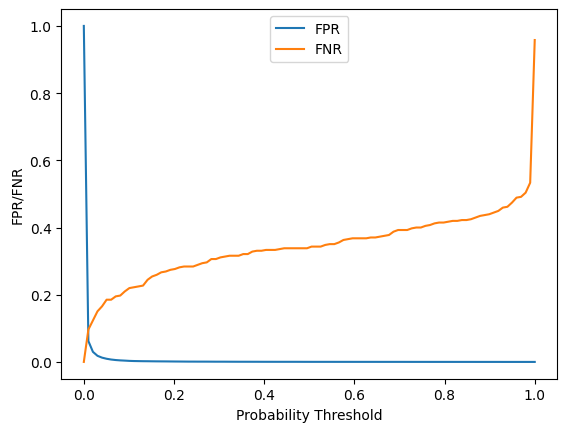

In [86]:
sns.lineplot(x=metrics.index, y='FPR', data=metrics, label='FPR')
sns.lineplot(x=metrics.index, y='FNR', data=metrics, label='FNR')
plt.xlabel('Probability Threshold')
plt.ylabel('FPR/FNR')
plt.legend()

Text(0.5, 1.0, 'FPR and FNR vs Discriminant Threshold')

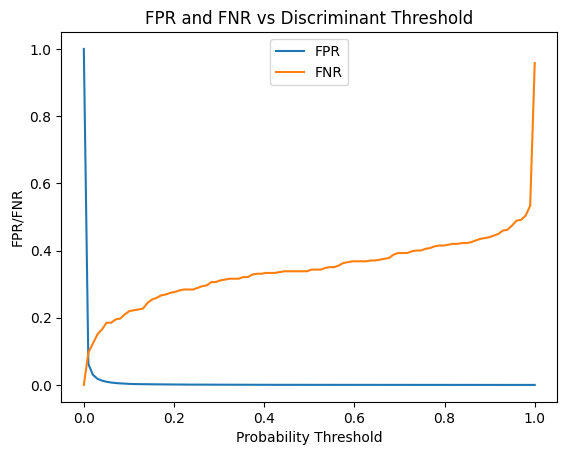

In [83]:
metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('FPR/FNR')
plt.title('FPR and FNR vs Discriminant Threshold')

In [82]:
dir(metrics)

['FNR',
 'FPR',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 